<a href="https://colab.research.google.com/github/precious112/Machine_Learning-Projects/blob/main/Youtube_likes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Youtube Like prediction using kaggle Youtube likes prediction dataset**

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
sample = pd.read_csv('train.csv')

In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26061 entries, 0 to 26060
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_id       26061 non-null  int64  
 1   title          26061 non-null  object 
 2   channel_title  26061 non-null  object 
 3   category_id    26061 non-null  float64
 4   publish_date   26061 non-null  object 
 5   tags           26061 non-null  object 
 6   views          26061 non-null  float64
 7   dislikes       26061 non-null  float64
 8   comment_count  26061 non-null  float64
 9   description    26061 non-null  object 
 10  country_code   26061 non-null  object 
 11  likes          26061 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 2.4+ MB


In [ ]:
sample.head

<bound method NDFrame.head of        video_id  ...    likes
0         53364  ...   2351.0
1         51040  ...   3264.0
2          1856  ...    580.0
3         22618  ...  82773.0
4         74074  ...   3557.0
...         ...  ...      ...
26056     73469  ...   7256.0
26057     45412  ...   1468.0
26058     61555  ...  40282.0
26059     45134  ...   4247.0
26060      5968  ...   2236.0

[26061 rows x 12 columns]>

In [ ]:
sample.describe()

,video_id,category_id,views,dislikes,comment_count,likes
count,26061.000000,26061.000000,2.606100e+04,26061.000000,26061.000000,2.606100e+04
mean,44560.500518,21.498292,3.875939e+05,539.231380,1693.145620,1.258067e+04
std,25688.103401,6.304901,1.595818e+06,3117.168779,9247.594359,5.856355e+04
min,2.000000,1.000000,7.870000e+02,0.000000,0.000000,0.000000e+00
25%,22523.000000,22.000000,6.859900e+04,53.000000,93.000000,6.830000e+02
50%,44648.000000,24.000000,1.535950e+05,134.000000,389.000000,2.541000e+03
75%,66744.000000,25.000000,3.380170e+05,348.000000,1211.000000,8.553000e+03
max,89272.000000,43.000000,1.434083e+08,217017.000000,692312.000000,3.880088e+06


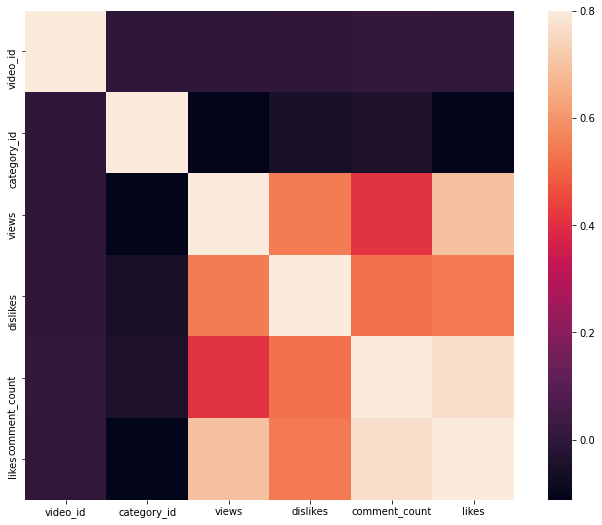

In [ ]:
corrmat = sample.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

In [ ]:
sample.drop(columns=['title','channel_title','publish_date','tags','description','country_code','category_id'])

,video_id,views,dislikes,comment_count,likes
0,53364,351430.0,298.0,900.0,2351.0
1,51040,461508.0,74.0,314.0,3264.0
2,1856,40205.0,150.0,100.0,580.0
3,22618,509726.0,847.0,4536.0,82773.0
4,74074,74311.0,69.0,161.0,3557.0
...,...,...,...,...,...
26056,73469,103852.0,88.0,856.0,7256.0
26057,45412,62070.0,53.0,219.0,1468.0
26058,61555,1529753.0,1636.0,2146.0,40282.0
26059,45134,185860.0,91.0,602.0,4247.0


In [ ]:
#using normal equation for prediction
from sklearn.model_selection import train_test_split
columns = ['video_id','views','dislikes','comment_count']
X= sample[columns]
y= sample['likes']
print(X.shape)
print(y.shape)

(26061, 4)
(26061,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
print(X_train.shape)
print(X_test.shape)

(19545, 4)
(6516, 4)


In [ ]:
X_b = np.c_[np.ones((19545,1)),X_train]
teta = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
teta

array([-2.69917981e+02,  4.05242731e-03,  1.67328044e-02, -9.09149306e-01,
        3.99804999e+00])

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
X_test_b = np.c_[np.ones((6516,1)),X_test]
y_predict = X_test_b.dot(teta)
mean_absolute_error(y_test,y_predict)

6807.879715348413

In [ ]:
print(mean_squared_error(y_test,y_predict))

644929388.5697206


In [ ]:
from sklearn.linear_model import ElasticNet
lasso_reg = ElasticNet(alpha=0.1)
lasso_reg.fit(X_train,y_train)
lasso_reg.predict(X_test)
y_pred = lasso_reg.predict(X_test)

In [ ]:
lasso_reg.score(X_test,y_test)

0.6939592679925639

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,y_pred)

6807.879720315074

In [ ]:
print(mean_squared_error(y_test,y_pred))

644929387.7210525


In [ ]:
print(y_pred)

[ 6669.69205839   132.9329725  10128.4919884  ... 61701.57188721
  2141.95855515   -75.97043959]


In [ ]:
print(y_test)

13024      952.0
9352       153.0
25300    10605.0
20643      717.0
4584      2350.0
          ...   
18869      126.0
12419    41124.0
21750    17091.0
1009      2025.0
15618       57.0
Name: likes, Length: 6516, dtype: float64


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=2000, learning_rate=0.01)
gbrt.fit(X_train,y_train)
y_pred3 = gbrt.predict(X_test)

In [ ]:
print(y_test)

13024      952.0
9352       153.0
25300    10605.0
20643      717.0
4584      2350.0
          ...   
18869      126.0
12419    41124.0
21750    17091.0
1009      2025.0
15618       57.0
Name: likes, Length: 6516, dtype: float64


In [ ]:
print(y_pred3)

[ 7598.43050209   294.46975802  5810.5910316  ... 56431.63746327
  1685.19746854   294.46975802]


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,y_pred3)

5694.5282468232

In [ ]:
print(mean_squared_error(y_test,y_pred3))

500051409.29520684


In [ ]:
gbrt.score(X_test,y_test)

0.7627087519102992

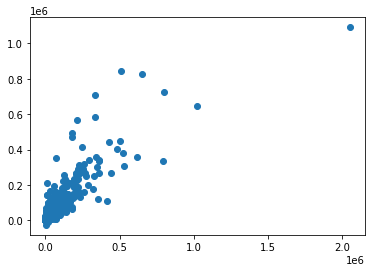

In [ ]:
plt.scatter(y_test,y_pred3)